**Historical data of Bitcoin exchange price in SAR and USD**

Data description:

Date: The date on which the Bitcoin exchange data was recorded.

open_SAR: The opening price of Bitcoin in SAR on a given date.

open_USD: The opening price of Bitcoin in USD on the same date.

high_SAR: The highest price of Bitcoin in SAR that was reached during the trading period on a given date.

high_USD: The highest price of Bitcoin in USD reached during the same trading period.

low_SAR: The lowest price of Bitcoin in SAR that occurred on the same date.

low_USD: The lowest price of Bitcoin in USD during the same trading period.

close_SAR: The closing price of Bitcoin in SAR at the end of the trading period on a given date.

close_USD: The closing price of Bitcoin in USD at the end of the same trading period.

volume: The trading volume of Bitcoin on the date, indicating the total number of Bitcoin units traded.

In [1]:
!pip3 install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pmdarima as pm
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
import io
import pandas as pd

data = pd.read_csv('dc.csv')
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(data.head())

        date     open_SAR  open_USD     high_SAR  high_USD      low_SAR  \
0 2021-01-30  128437.2485  34246.28  131012.7232  34933.00  123106.8800   
1 2021-01-29  125144.0223  33368.18  144510.0378  38531.90  119695.5162   
2 2021-01-28  113870.3574  30362.19  126703.4386  33783.98  111919.8118   
3 2021-01-27  121753.0231  32464.01  122102.8604  32557.29  109668.1467   
4 2021-01-26  120966.1142  32254.19  123470.2188  32921.88  115652.4724   

    low_USD    close_SAR  close_USD  volume  
0  32825.00  128333.2124   34218.54   43072  
1  31915.40  128459.4509   34252.20  231827  
2  29842.10  125131.5709   33364.86   92621  
3  29241.72  113885.2090   30366.15   95911  
4  30837.37  121767.1246   32467.77   84972  


In [5]:
num_obs = len(data)
print(f"Number of Observations: {num_obs}")


Number of Observations: 1000


In [6]:
mean_values = data[["open_SAR", "open_USD", "high_SAR", "high_USD", "low_SAR", "low_USD", "close_SAR", "close_USD", "volume"]].mean()
print("Mean values:\n", mean_values)


Mean values:
 open_SAR     34825.322255
open_USD      9285.762120
high_SAR     35789.618165
high_USD      9542.880270
low_SAR      33796.329057
low_USD       9011.393200
close_SAR    34917.483572
close_USD     9310.335850
volume       53100.498000
dtype: float64


In [7]:
median_values = data[["open_SAR", "open_USD", "high_SAR", "high_USD", "low_SAR", "low_USD", "close_SAR", "close_USD", "volume"]].median()
print("Median values:\n", median_values)


Median values:
 open_SAR     30714.632130
open_USD      8189.695000
high_SAR     31321.953150
high_USD      8351.630000
low_SAR      30010.869570
low_USD       8002.045000
close_SAR    30713.263235
close_USD     8189.330000
volume       43795.500000
dtype: float64


In [ ]:
max_values = data[["open_SAR", "open_USD", "high_SAR", "high_USD", "low_SAR", "low_USD", "close_SAR", "close_USD", "volume"]].max()
print("Maximum values:\n", max_values)


Maximum values:
 open_SAR     152217.3348
open_USD      40586.9600
high_SAR     157329.2800
high_USD      41950.0000
low_SAR      145215.4880
low_USD       38720.0000
close_SAR    152201.7706
close_USD     40582.8100
volume       402201.0000
dtype: float64


In [ ]:
min_values = data[["open_SAR", "open_USD", "high_SAR", "high_USD", "low_SAR", "low_USD", "close_SAR", "close_USD", "volume"]].min()
print("Minimum values:\n", min_values)


Minimum values:
 open_SAR     12045.19718
open_USD      3211.71000
high_SAR     12288.18560
high_USD      3276.50000
low_SAR      11837.23750
low_USD       3156.26000
close_SAR    12045.23469
close_USD     3211.72000
volume        5743.00000
dtype: float64


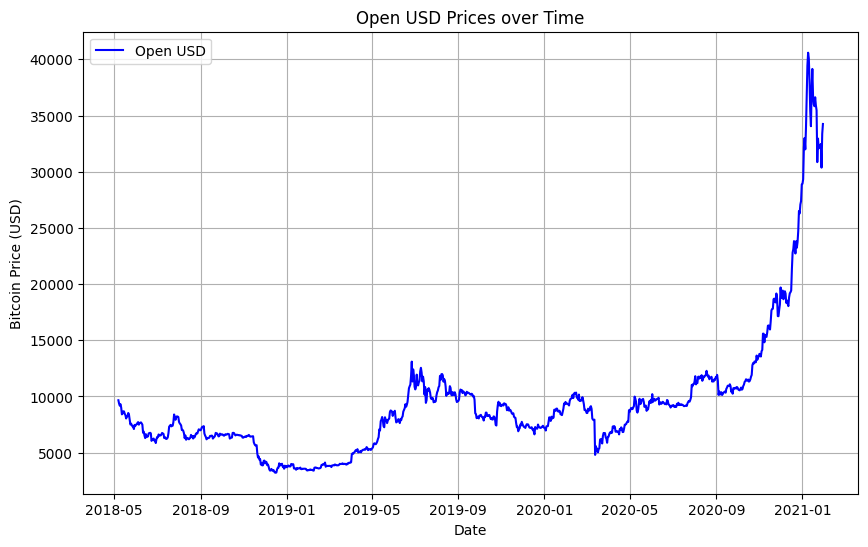

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data['date'], data['open_USD'], color='blue', label='Open USD')

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price (USD)')
ax.set_title('Open USD Prices over Time')

ax.legend()

plt.grid(True)
plt.show()

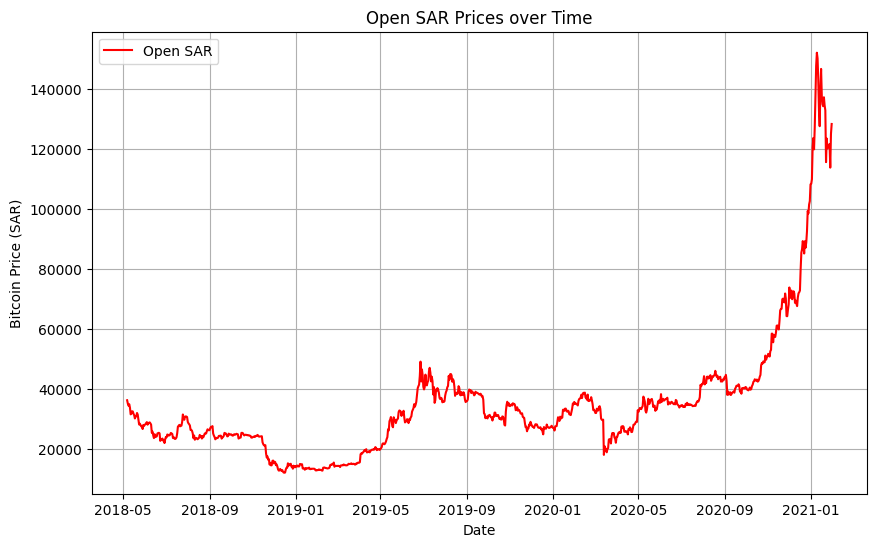

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data['date'], data['open_SAR'], color='red', label='Open SAR')

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price (SAR)')
ax.set_title('Open SAR Prices over Time')

ax.legend()

plt.grid(True)
plt.show()

The two plots display the opening prices of Bitcoin in USD and opening prices of Bitcoin in SAR over a specific time period, starting from May 2018 (beginning date) to January 2021 (ending date).
The x-axis represents the date, while the y-axis shows the Bitcoin price in USD and SAR.
The blue line shows the trend of Bitcoin prices in USD, and the red line shows for prices in SAR.

Visually two graphs are quite the same, except one thing, the unit Bitcoin price axis, y axis vary from 0 to 40000 in USD, and for SAR vary from 0 to 140000. The reason the two line charts appear visually similar is due the relationship between USD and SAR is relatively constant over the time period covered by the charts. In both charts, the visual patterns are the same, and the shape of the lines representing the Bitcoin price over time is consistent. However, the scales of the y-axes vary for USD and SAR. This is a common observation when plotting the same data in different currencies.

From plots, we can say that there may be some multiplicative trend, as overall, the unit price for both currencies increase similar to exponentially. The trend is obvious starting from in middle of July 2020 until the end. Reasons for this trend could be increasing demand for Bitcoin as an investment or store of value, macroeconomic factors affecting the value of cryptocurrencies, or a growing interest in cryptocurrencies as an alternative asset class.
Also, there is possible structural break in period of October 2020 to January 2021, as the price increases very high and very rapidly. Factors contributing to this structural break might include regulatory changes, market sentiment shifts, or the impact of the COVID-19 pandemic on financial markets. It could also be influenced by external macroeconomic events.
No visible patterns of Seasonality. The absence of visible seasonality patterns suggests that Bitcoin prices do not exhibit regular, recurring fluctuations over specific time intervals.
This is in line with the nature of cryptocurrencies, which are influenced more by market sentiment, investor behavior, and external events than by traditional seasonal patterns.


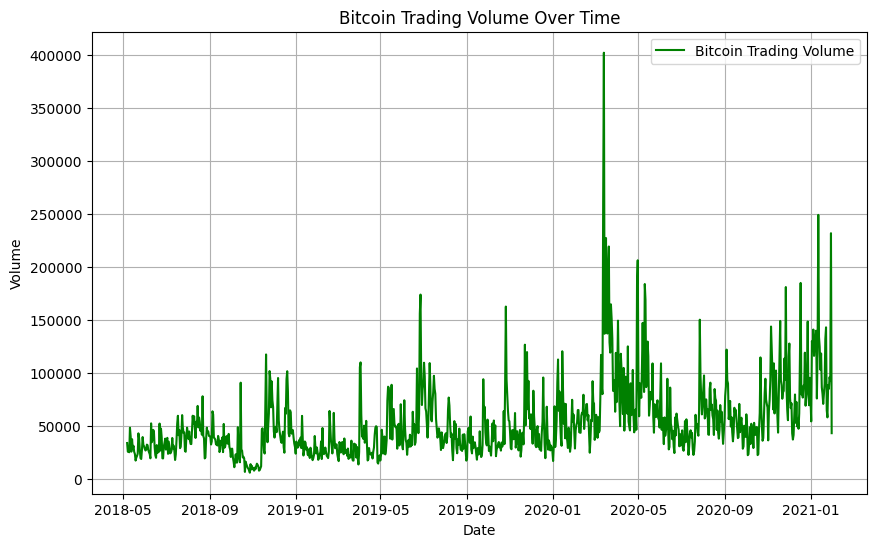

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data['date'], data['volume'], color='green', label='Bitcoin Trading Volume')

ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Bitcoin Trading Volume Over Time')

ax.legend()

plt.grid(True)
plt.show()


This plot displays the trading volume of Bitcoin over a specific time period, starting from May 2018 (beginning date) to January 2021 (ending date). This plot allows you to observe the changes in trading activity for Bitcoin over the given time period.

No much visible trend, maybe a weak positive additive one, as Volumes overall are visually in average increasing with a small slope. This trend could be indicative of a growing interest in Bitcoin as a tradable asset or increasing participation in the cryptocurrency market.

Can not say much about seasonal patterns (not clear patterns neither can state that no seasonal patterns at all) only by observing the plots, further examinations required. It's possible that factors such as market sentiment, major events, or external influences have a more significant impact on trading volume than traditional seasonality.

Structural break for Volumes can be noticed on March 2020, their number increase very high in very drastic manner. The reasons for this structural break could be multifaceted, including the impact of the COVID-19 pandemic on financial markets, increased trading interest during a period of market uncertainty, or changes in market regulations.


Article 1: Möser, M., Böhme, R., & Breuker, D. (2013). Analyzing the Bitcoin Network: The First Four Years.
Review: Möser, M., Böhme, R., & Breuker, D. (2013) delve into the Bitcoin transaction network from 2009-2013, employing graph-theoretic techniques. Through clustering methods, the study discerns patterns and trends within the data. Key insights reveal that despite users' attempts to retain anonymity via multiple addresses, the data discloses significant entities within the Bitcoin ecosystem, pinpointing primary market participants.

Article 2: Chiu, J., & Koeppl, T. (2017). The Economics of Cryptocurrencies – Bitcoin and Beyond.
Review: Chiu, J., & Koeppl, T. (2017) examine the economic facets of cryptocurrencies, with a focus on Bitcoin. By constructing a theoretical framework capturing the essence of open-source cryptocurrency technology, the study underscores fundamental flaws in Bitcoin's design. The proof-of-work validation system, they argue, is inefficient, suggesting that scalable alternatives could surpass Bitcoin's performance.








From now on, we will focuse on the USD price of Bitcoin and try different models on it to determine which one can result in valuable forecasts.

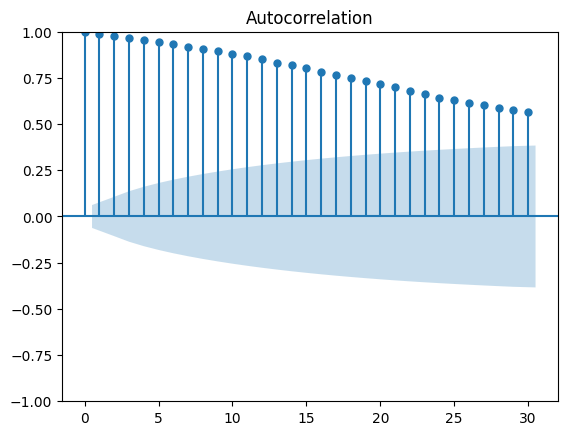

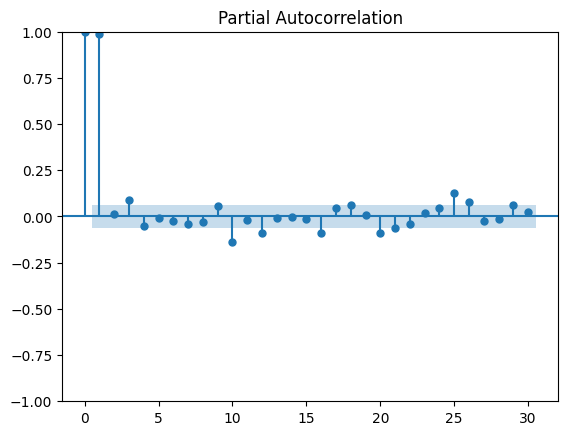

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['open_USD'], lags = 30)
plot_pacf(data['open_USD'], lags = 30)
plt.show()

Inference from a non differenced data. From the PACF plot , we notice a sharp cut-off after the first lag. The ACF plot shows a more gradual decline. Both plots demonstrate behavior not typical for the stationary series. Lets proceed with KPSS and ADF tests to understand the processes.

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF test
adf_test = adfuller(data['open_USD'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'\t{key}: {value}')

# KPSS test
kpss_test = kpss(data['open_USD'], regression='c')
print('KPSS Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'\t{key}: {value}')

ADF Statistic: -7.001012228604357
p-value: 7.322041200414004e-10
Critical Values:
	1%: -3.4370334797663844
	5%: -2.8644907213150725
	10%: -2.568341114581742
KPSS Statistic: 2.2115304432553824
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


**ADF Test**: The Augmented Dickey-Fuller test result shows a test statistic (-7.001012228604363) that is lower than the critical values at 1%, 5%, and 10%. This means we can reject the null hypothesis of a unit root, indicating that the series is stationary. The p-value is extremely small (7.322041200413763e-10), which further supports the rejection of the null hypothesis.
**KPSS Test**: The KPSS test statistic (2.2115304432553824) is higher than the critical values at all significance levels, and the p-value is 0.01, which is below the common alpha level of 0.05. This means we would reject the null hypothesis that the series is stationary around a mean (level stationary).
Here's the interpretation dilemma:

The ADF test suggests that the series is stationary.
The KPSS test suggests that the series is not stationary.



In [8]:
data.index = pd.to_datetime(data['date'])
del data["date"]

In [9]:
data

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2021-01-30,128437.24850,34246.28,131012.72320,34933.00,123106.88000,32825.00,128333.21240,34218.54,43072
2021-01-29,125144.02230,33368.18,144510.03780,38531.90,119695.51620,31915.40,128459.45090,34252.20,231827
2021-01-28,113870.35740,30362.19,126703.43860,33783.98,111919.81180,29842.10,125131.57090,33364.86,92621
2021-01-27,121753.02310,32464.01,122102.86040,32557.29,109668.14670,29241.72,113885.20900,30366.15,95911
2021-01-26,120966.11420,32254.19,123470.21880,32921.88,115652.47240,30837.37,121767.12460,32467.77,84972
...,...,...,...,...,...,...,...,...,...
2018-05-11,33761.88838,9002.21,33816.60672,9016.80,31282.08640,8341.00,31503.36000,8400.00,48227
2018-05-10,34916.22400,9310.00,35235.45805,9395.12,33641.08800,8970.00,33761.85088,9002.20,25055
2018-05-09,34421.17120,9178.00,35216.25600,9390.00,33622.33600,8965.00,34916.22400,9310.00,25673


In [10]:
train_test_ratio = 0.8  

split_index = int(len(data) * train_test_ratio)

test_data = data[:-split_index]
train_data = data[-split_index:]


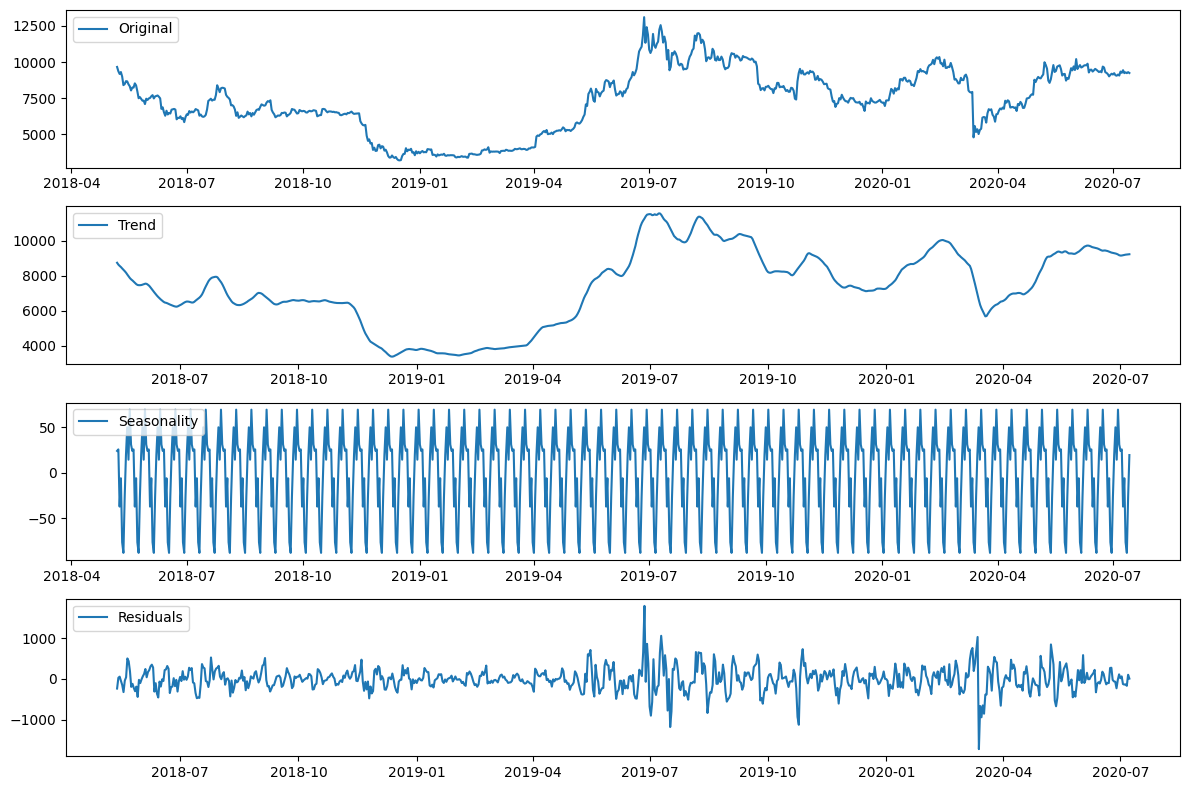

In [11]:
decomposition = seasonal_decompose(train_data['open_USD'], model = 'additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_data['open_USD'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Variance does not seem constant for our residuals, the trend is positive and there maybe some kind of seasonality. More analysis required for more inferences.

The most significant lags are on 1 for both ACF and PACF so lets take the orders for MA and AR 1, also there are significant lags for ACF, so lets take d = 1.

In [12]:
order = (1, 1, 1)
seasonal_order = (2, 1, 1, 12)

sarima_model = SARIMAX(train_data['open_USD'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           open_USD   No. Observations:                  800
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -5632.130
Date:                            Mon, 11 Dec 2023   AIC                          11276.260
Time:                                    02:48:28   BIC                          11304.269
Sample:                                         0   HQIC                         11287.028
                                            - 800                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9997      1.108     -0.902      0.367      -3.171       1.172
ma.L1          0.9996      0.905   

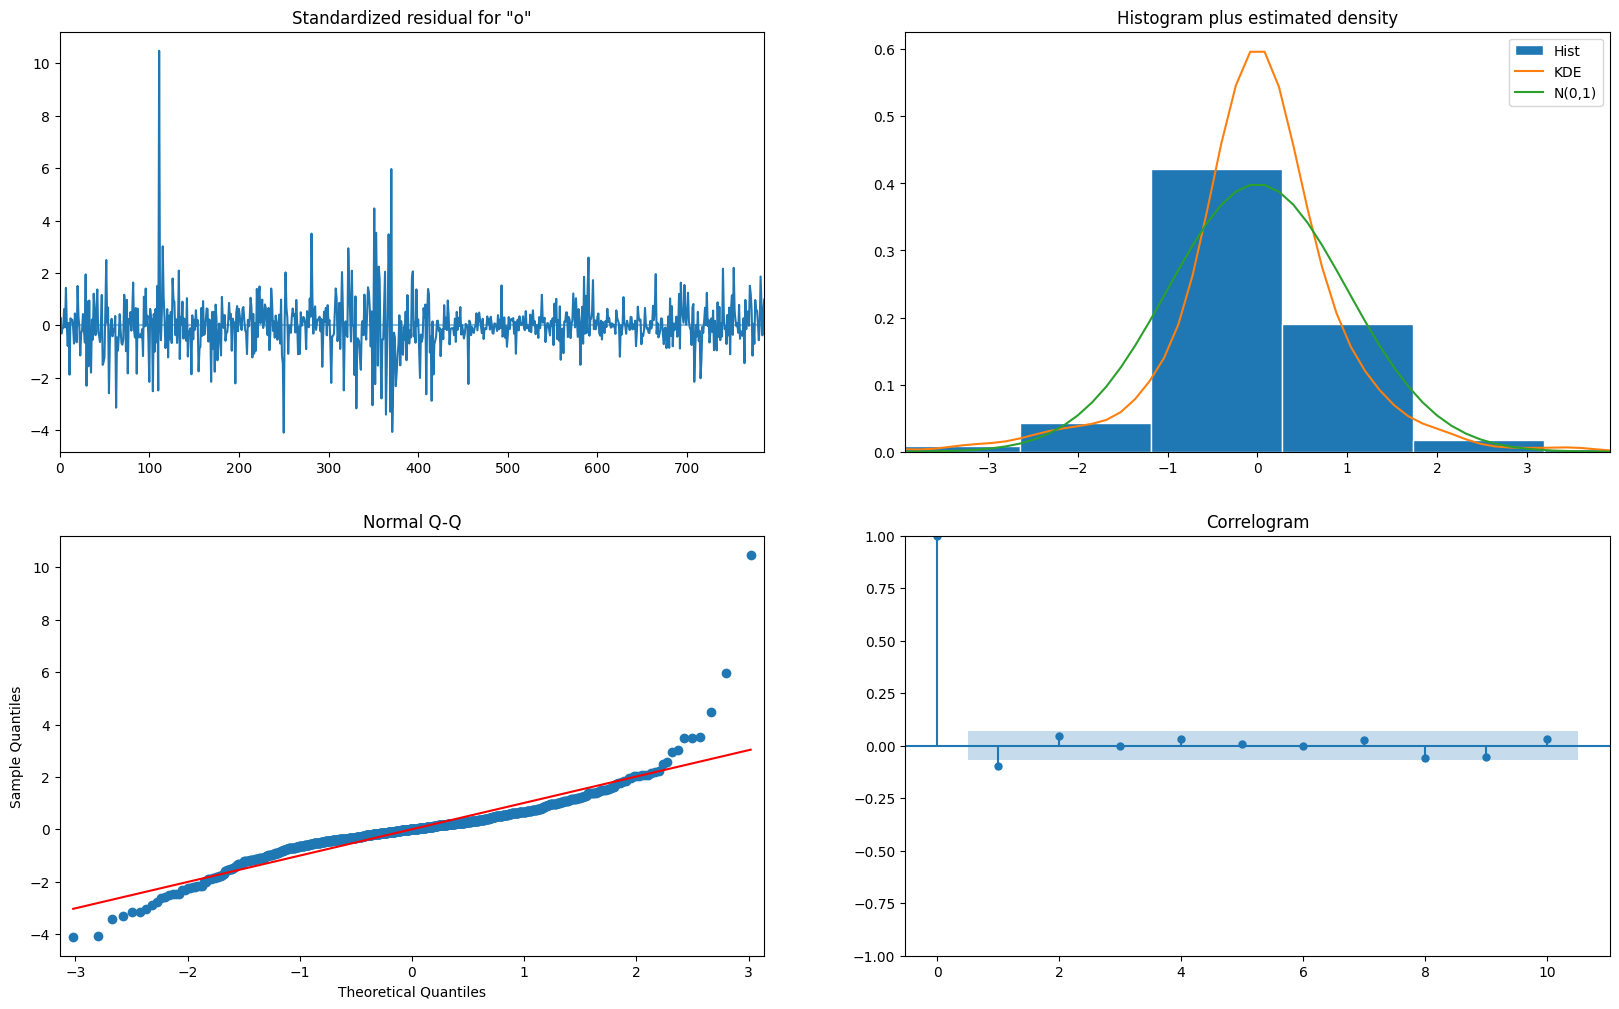

In [40]:
sarima_model.fit().plot_diagnostics(figsize=(20,12))
plt.show()

In [41]:
resids = sarima_results.resid
ljung_test = sm.stats.acorr_ljungbox(resids, auto_lag=True)
ljung_test

,lb_stat,lb_pvalue
1,1.072313,0.300424
2,1.315441,0.518031
3,1.315456,0.725466
4,1.614375,0.806206
5,1.746410,0.883002
6,1.876735,0.930679
7,1.978837,0.961002
8,4.159416,0.842461
9,4.428217,0.881040
10,4.675579,0.911770


As we see, our predicted model does its task very poorly. The distribution of residuals is not even close to normal, and the variance is not constant. However, The Ljung-Box test on SARIMA model residuals indicates not significant autocorrelation up to lag 11, as all p-values are well above 0.05, suggesting that the residuals are independent. Lets try now auto.arima.

In [43]:
model = pm.auto_arima(train_data['open_USD'], seasonal=True, m=12, trace=True,
                      error_action='ignore', suppress_warnings=True,
                      max_d=1, max_D=1, max_p=3, max_q=3, max_P=3, max_Q=3)


Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=11389.974, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11389.520, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11383.559, Time=0.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11384.141, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11387.523, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=11383.744, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=11385.394, Time=0.91 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=11385.434, Time=1.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=11383.503, Time=1.08 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=11385.411, Time=1.11 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=11387.328, Time=1.99 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=11389.293, Time=0.39 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=11384.341, Time=0.59 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=11384.479, Time=1.30 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=11386

In [44]:
best_order = model.order
print(f"Best ARIMA Order: {best_order}")
best_seasonal_order = model.seasonal_order
print(f"Best ARIMA Seasonal Order: {best_seasonal_order}")
aic_value = model.aic()
bic_value = model.bic()

print(f"AIC: {aic_value}")
print(f"BIC: {bic_value}")


Best ARIMA Order: (1, 1, 0)
Best ARIMA Seasonal Order: (0, 0, 1, 12)
AIC: 11381.506616797058
BIC: 11395.556699634357


In [13]:
model = SARIMAX(train_data["open_USD"], order=(1, 1, 0), seasonal_order=(0, 0, 1, 12), trend = 'c')
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                             open_USD   No. Observations:                  800
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood               -5687.752
Date:                              Mon, 11 Dec 2023   AIC                          11383.503
Time:                                      02:48:43   BIC                          11402.237
Sample:                                           0   HQIC                         11390.700
                                              - 800                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4637     11.919      0.039      0.969     -22.897      23.824
ar.L1         -0.09

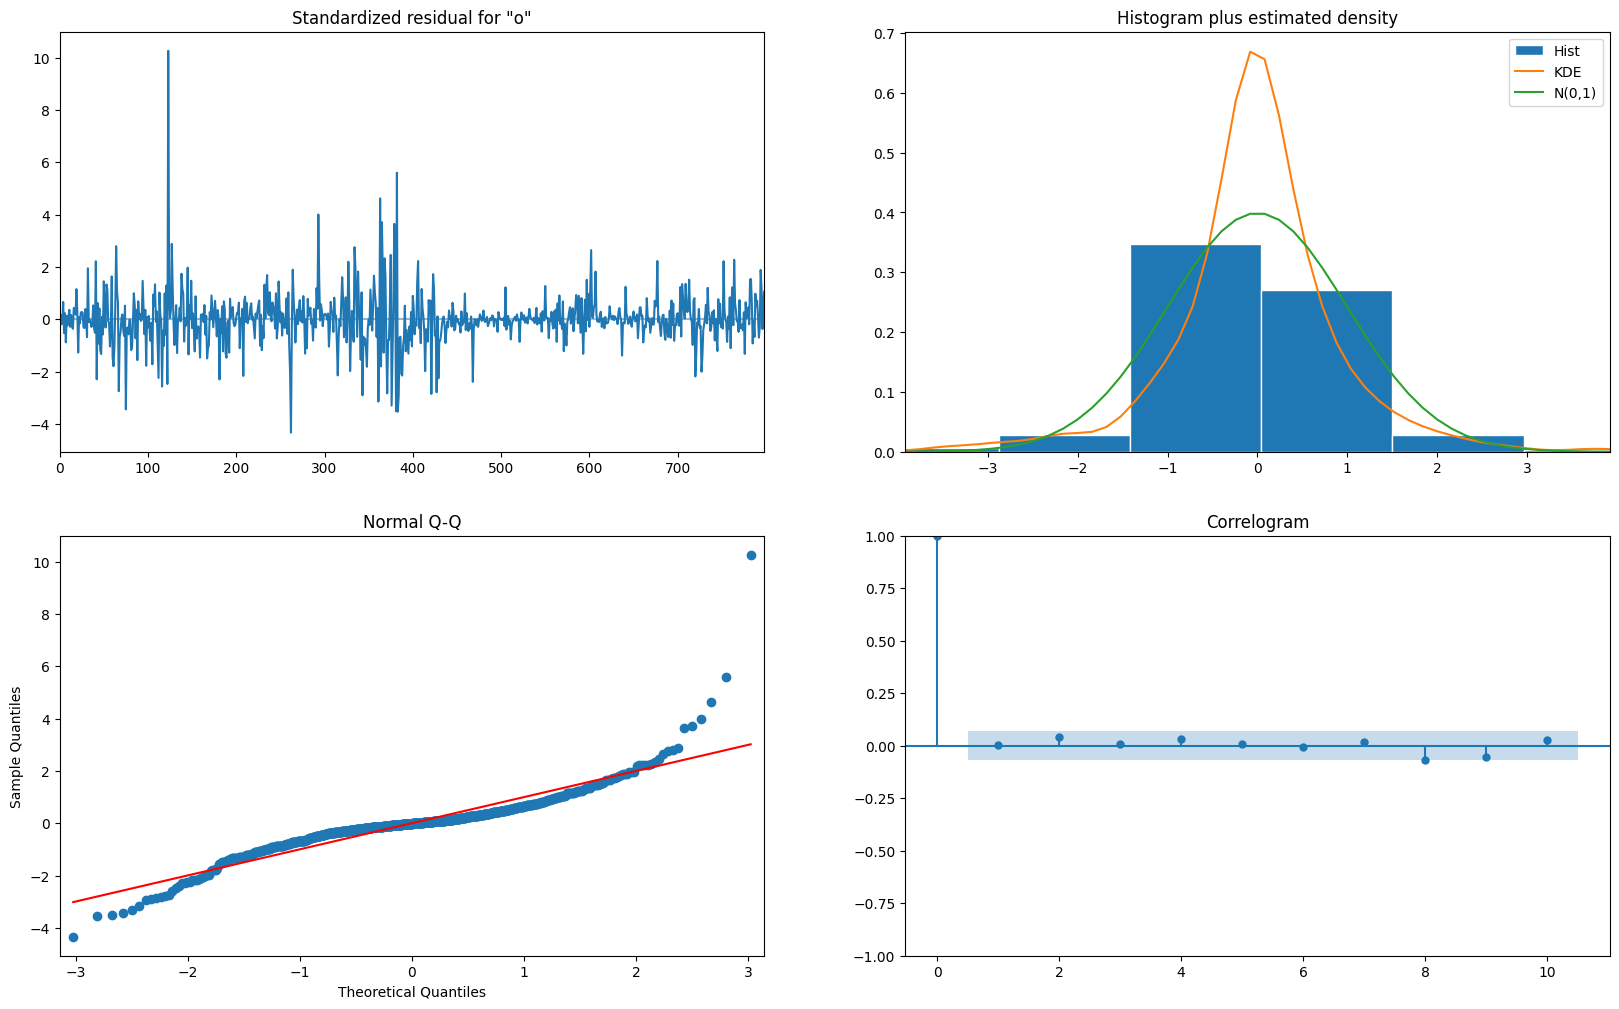

In [46]:
model_fit.plot_diagnostics(figsize=(20,12))
plt.show()

As you see, neither of the sarima models does effectively fit with our data. Again same problems with the auto.arima model, It is mainly because of the nature of our series, the fluctuations in variance can not be catched by SARIMA models. However lets continue and see which one does its job better.

In [14]:
sarima_forecast = sarima_results.forecast(len(test_data['open_USD']))
best_sarima_forecast = model_fit.forecast(len(test_data['open_USD']))

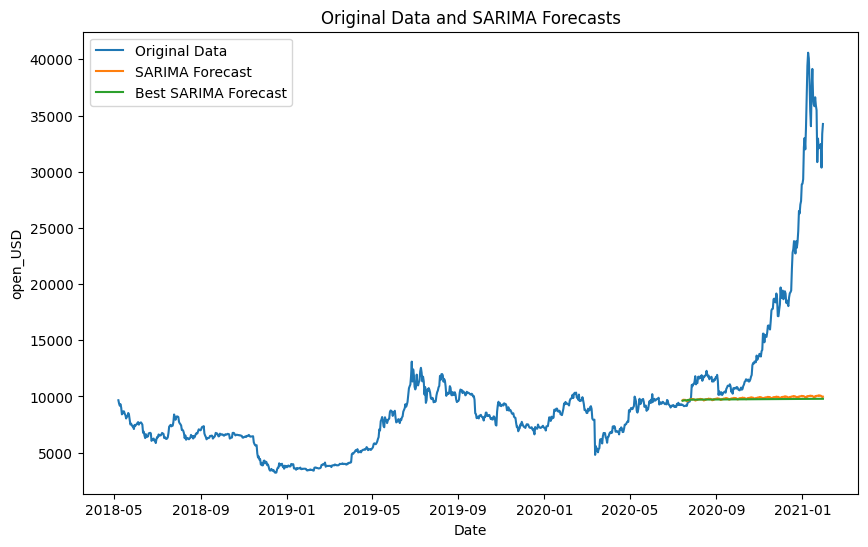

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['open_USD'], label='Original Data')

sarima_forecast_reverse = sarima_forecast.iloc[::-1]
best_sarima_forecast_reverse = best_sarima_forecast.iloc[::-1]

forecast_index = data.index[:int(len(data) * 0.2)]
data.index
plt.plot(forecast_index, sarima_forecast_reverse, label='SARIMA Forecast')
plt.plot(forecast_index, best_sarima_forecast_reverse, label='Best SARIMA Forecast')

plt.title('Original Data and SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('open_USD')
plt.legend()
plt.show()

None of the models forecasted even near to the actual values of the cryptocurrency, which is not unbelievable and unexpected. One of the reasons for such thing to happen is that cryptocurrency markets are known for their high volatility and sensitivity to news events. Sudden changes in market sentiment or external events can lead to sharp price movements that are challenging for time-series models to predict. Also, as we examined, SARIMA models typically rely on historical prices as the main input. If there are other relevant features that influence Bitcoin prices and are not considered in the model (e.g., trading volume, social media sentiment, macroeconomic indicators), the model might not fully capture the underlying patterns.


In [115]:
mse_bestsarima_model = (mean_squared_error(test_data["open_USD"], best_sarima_forecast))
mse_sarima_model = (mean_squared_error(test_data["open_USD"], sarima_forecast))
print(f'MSE for Best SARIMA model: {mse_bestsarima_model}')
print(f'MSE for SARIMA model: {mse_sarima_model}')


MSE for Best SARIMA model: 126846272.99033915
MSE for SARIMA model: 126312108.33411434


As we can see, our analyzed model orders for SARIMA suited much better, than the ones suggested by auto.arima. Now we proceed with it. We will try to estimate the changes of Bitcoin currency in USD for the next 2 months, as for cryptocurrency predictions even short-term forecasts are very useful and decisive.

In [16]:
order = (1, 1, 1)
seasonal_order = (2, 1, 1, 12)
best_model = SARIMAX(data["open_USD"], order=order, seasonal_order=seasonal_order)
best_model_fit = best_model.fit()
best_model_forecast = best_model_fit.forecast(12)

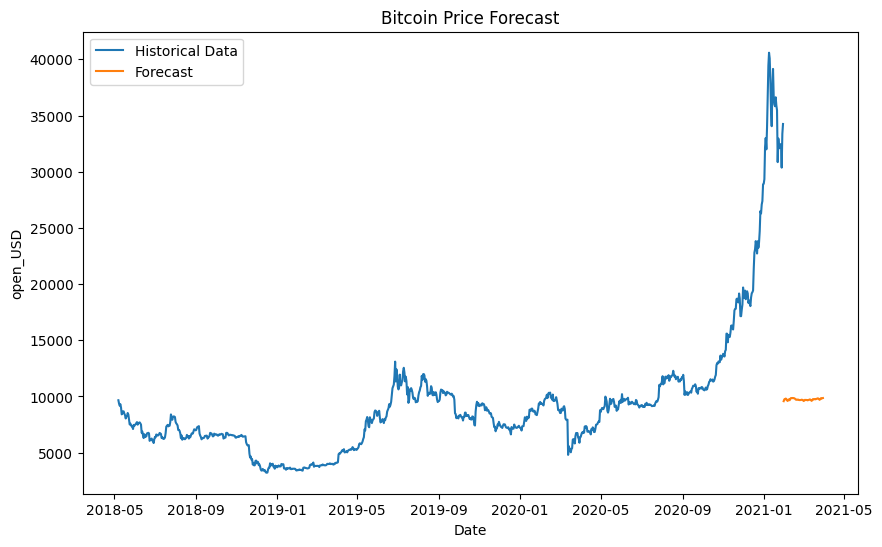

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['open_USD'], label='Historical Data')

forecast_period = 60
forecast_index = pd.date_range(data.index[0], periods=forecast_period + 1, freq='D')[1:]
forecast_values = best_model_fit.forecast(steps=forecast_period)

plt.plot(forecast_index, forecast_values, label='Forecast')

plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('open_USD')
plt.legend()
plt.show()

For the next two months, we can see, that the SARIMA model predicted a drastic decrease in Bitcoin value, though it will be more less stable, which is not natural for cryptocurrencies.
Overall, there are man reasons to not use SARIMA models for our time series, as there are man reasons because of which such models can not capture all features of cryptocurrency nature.

**Holt Winter smooth**

Visually, from the graph of open_USD, we can't say much about its stationarity or trend patterns. From plots, we can say that there may be some multiplicative trend, as overall, the unit price for both currencies increase similar to exponentially. Nothing much can be said about seasonality part, though now we will estimate the AIC for various EST models, and see which one is best, though theoretically it will be the one with multiplicative trend and no seasonality.

In [52]:
add_trend = ExponentialSmoothing(train_data['open_USD'],trend='add',seasonal=None,seasonal_periods=12).fit()
print(f"add_trend aic: {add_trend.aic}, bic:{add_trend.bic}")

add_trend aic: 9129.859111083819, bic:9148.59755799449


In [53]:
add_seasonality = ExponentialSmoothing(train_data['open_USD'],trend=None,seasonal='add',seasonal_periods=12).fit()
print(f"add_seasonality aic: {add_seasonality.aic}, bic:{add_seasonality.bic}")

add_seasonality aic: 9148.978868953674, bic:9214.563433141026


In [54]:
add_seasonalitytrend= ExponentialSmoothing(train_data['open_USD'],trend='add',seasonal='add',seasonal_periods=12).fit()
print(f"add_seasonalitytrend aic: {add_seasonalitytrend.aic}, bic:{add_seasonalitytrend.bic}")

add_seasonalitytrend aic: 9165.893278213493, bic:9240.84706585618


In [55]:
mul_seasonalitytrend = ExponentialSmoothing(train_data['open_USD'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
print(f"mul_seasonalitytrend aic: {mul_seasonalitytrend.aic}, bic:{mul_seasonalitytrend.bic}")

mul_seasonalitytrend aic: 9157.017214068233, bic:9231.971001710921


In [56]:
mul_seasonality = ExponentialSmoothing(train_data['open_USD'],trend=None,seasonal='mul',seasonal_periods=12).fit()
print(f"mul_seasonality aic: {mul_seasonality.aic}, bic:{mul_seasonality.bic}")

mul_seasonality aic: 9153.045851382676, bic:9218.630415570027


In [18]:
mul_trend = ExponentialSmoothing(train_data['open_USD'],trend='mul',seasonal=None,seasonal_periods=12).fit()
print(f"mul_trend aic: {mul_trend.aic}, bic:{mul_trend.bic}")

mul_trend aic: 9153.309431682652, bic:9172.047878593323


In [58]:
mulseason_addtrend = ExponentialSmoothing(train_data['open_USD'],trend='add',seasonal='mul',seasonal_periods=12).fit()
print(f"mulseason_addtrend aic: {mulseason_addtrend.aic}, bic:{mulseason_addtrend.bic}")

mulseason_addtrend aic: 9157.562939871415, bic:9232.516727514103


In [59]:
noseasontrend = ExponentialSmoothing(train_data['open_USD'],trend=None,seasonal=None,seasonal_periods=12).fit()
print(f"noseasontrend aic: {noseasontrend.aic}, bic:{noseasontrend.bic}")

noseasontrend aic: 9125.273710627656, bic:9134.642934082993


The best 2 fitting models here are the one that we predicted theoretically (only mul seasonality) and the one with no trend and seasonality. If we watched only values of AIC and BIC we would choose the last model, however there are explicit patterns of some trends in many parts of the graph, so we will proceed with mul_trend model.

In [19]:
ets_model = mul_trend
exp_smoothing_forecast = ets_model.forecast(len(test_data))

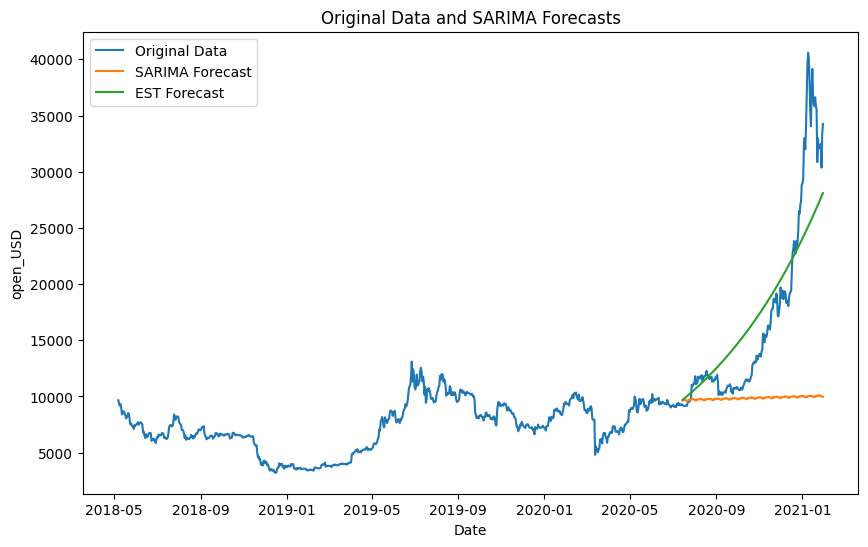

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['open_USD'], label='Original Data')

sarima_forecast_reverse = sarima_forecast.iloc[::-1]
exp_smoothing_forecast_reverse = exp_smoothing_forecast.iloc[::-1]

forecast_index = data.index[:int(len(data) * 0.2)]
data.index
plt.plot(forecast_index, sarima_forecast_reverse, label='SARIMA Forecast')
plt.plot(forecast_index, exp_smoothing_forecast_reverse, label='EST Forecast')

plt.title('Original Data and SARIMA Forecasts')
plt.xlabel('Date')
plt.ylabel('open_USD')
plt.legend()
plt.show()

In [139]:
mse_est = (mean_squared_error(test_data["open_USD"], exp_smoothing_forecast))
print(f'MSE for EST model: {mse_est}')
print(f'MSE for SARIMA model: {mse_sarima_model}')

MSE for EST model: 172104166.72766685
MSE for SARIMA model: 126312108.33411434


It is clear from the visualization that the EST model provides a closer approximation to the actual price movements and captures the positive trend observed in the recent data. In contrast, the SARIMA model’s forecasts do not exhibit a clear trend and diverge significantly from the actual values, indicating a poor fit.

The EST model closely tracks the real price and its uptrend, while the SARIMA model fails to predict the trend and deviates from actual prices. The EST model's focus on recent data makes it more effective for the volatile Bitcoin market, as confirmed also by lower MSE values. In essence, the EST model outperforms SARIMA in forecasting Bitcoin prices due to its responsiveness to new market information. This efficiency likely stems from the EST model's ability to adapt quickly to new data, reflecting the importance of recent information in predicting future prices.

In [23]:
mul_trend = ExponentialSmoothing(data['open_USD'],trend='mul',seasonal=None,seasonal_periods=12).fit()
model = SARIMAX(train_data["open_USD"], order=(1, 1, 0), seasonal_order=(0, 0, 1, 12), trend = 'c')
order = (1, 1, 1)
seasonal_order = (2, 1, 1, 12)
sarima_model = SARIMAX(data['open_USD'], order=order, seasonal_order=seasonal_order)


In [24]:
sarima_forecast = sarima_model.fit()
best_sarima_forecast = model.fit()


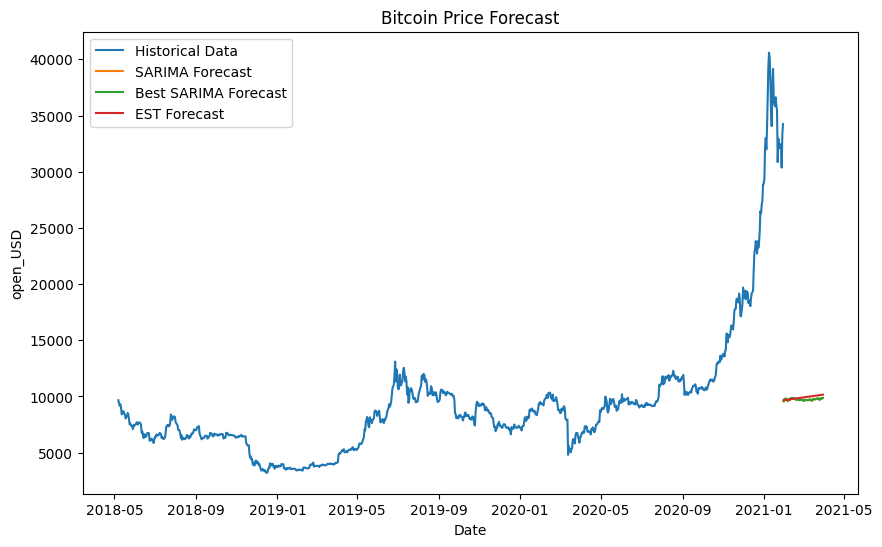

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['open_USD'], label='Historical Data')

forecast_period = 60
forecast_index = pd.date_range(data.index[0], periods=forecast_period + 1, freq='D')[1:]

sarima_forecast_values = sarima_forecast.forecast(steps=forecast_period)
plt.plot(forecast_index, sarima_forecast_values, label='SARIMA Forecast')

best_sarima_forecast_values = sarima_forecast.forecast(steps=forecast_period)
plt.plot(forecast_index, best_sarima_forecast_values, label='Best SARIMA Forecast')

est_forecast_values = mul_trend.forecast(steps=forecast_period)
plt.plot(forecast_index, est_forecast_values, label='EST Forecast')


plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('open_USD')
plt.legend()
plt.show()

All models predictions demonstrate a drastic shrinkage in the Bitcoin price and such behavior is mostly du to the reliance of models on the entire historical dataset, which may lead to less accurate predictions due to overdated information.

By focusing on data after start of 2021, the forecasts should become more reflective of the recent market conditions, potentially yielding more relevant and actionable insights. The graph suggests that although the models capture the volatile nature of Bitcoin to some extent, optimizing the time frame of the data used for modeling could enhance the reliability of the predictions. This adjustment may particularly improve the performance of the EST model, which is designed to respond more effectively to recent trends.



In [26]:
recent_data = data[data.index > "2021-01"]

mul_trend = ExponentialSmoothing(recent_data['open_USD'],trend='mul',seasonal=None,seasonal_periods=12).fit()
model = SARIMAX(recent_data["open_USD"], order=(2, 1, 2), seasonal_order=(0, 0, 3, 12), trend = 'c')
order = (1, 1, 1)
seasonal_order = (2, 1, 1, 12)
sarima_model = SARIMAX(recent_data['open_USD'], order=order, seasonal_order=seasonal_order)

In [27]:
sarima_forecast = sarima_model.fit()
best_sarima_forecast = model.fit()


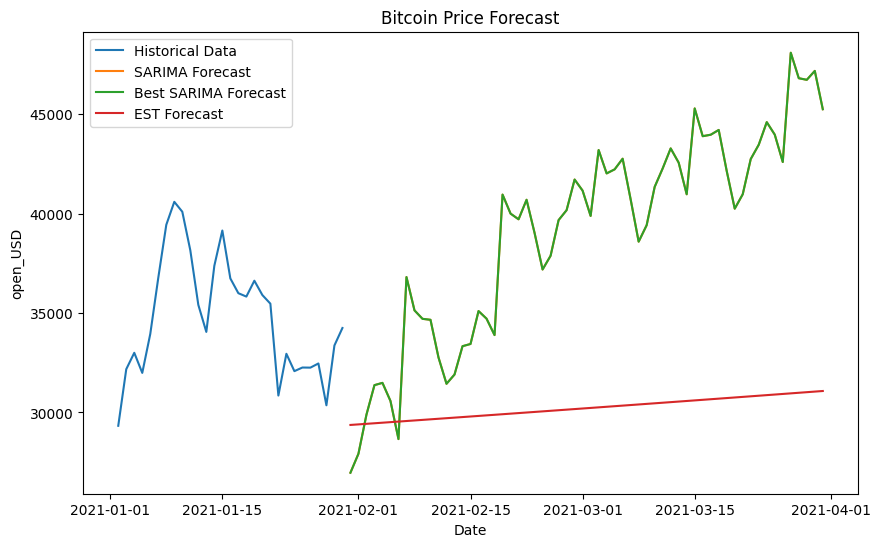

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(recent_data.index, recent_data['open_USD'], label='Historical Data')

forecast_period = 60
forecast_index = pd.date_range(recent_data.index[0], periods=forecast_period + 1, freq='D')[1:]

sarima_forecast_values = sarima_forecast.forecast(steps=forecast_period)
plt.plot(forecast_index, sarima_forecast_values, label='SARIMA Forecast')

best_sarima_forecast_values = sarima_forecast.forecast(steps=forecast_period)
plt.plot(forecast_index, best_sarima_forecast_values, label='Best SARIMA Forecast')

est_forecast_values = mul_trend.forecast(steps=forecast_period)
plt.plot(forecast_index, est_forecast_values, label='EST Forecast')


plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('open_USD')
plt.legend()
plt.show()

The plot illustrates that forecasts based on more recent data are considerably more precise than those using the entire historical dataset. This improved accuracy is likely because SARIMA and exponential smoothing models, which typically assume stability and linearity, are not well-suited to the volatile and non-linear behavior seen in cryptocurrency markets. As these markets are driven by complex and multifaceted factors, traditional forecasting models may not fully capture their dynamics. We can state now, that when working with volatile financial series like Bitcoin, focusing on recent data can yield more reliable predictions Cryptocurrency prices are influenced by complex factors, making traditional methods be not fully accurate.

So, one of the main issues here with our time series is High Volatility: Cryptocurrency prices are known for their extreme price swings and high volatility. Traditional forecasting methods like SARIMA and exponential smoothing assume that the data follows a relatively stable and linear pattern. When applied to cryptocurrency data, these methods may fail to capture the rapid and unpredictable price movements.

ARCH and GARCH models, designed for financial data, are better at capturing cryptocurrency volatility and time-varying patterns. They address the unique characteristics of cryptocurrency data, making them more suitable for forecasting and risk management.

In conclusion, we consider now on to try ARCH and GARCH models to catch the unpredictable and strange nature of cryptocurrencies in terms of volatility.

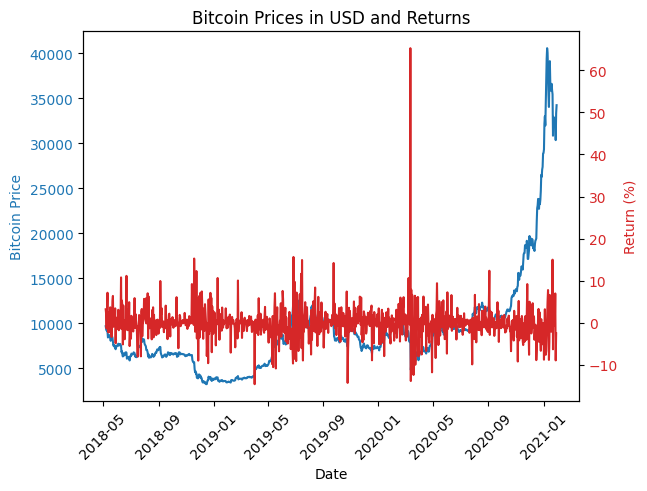

In [144]:
data['Return'] = data['open_USD'].pct_change() * 100

fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price', color='tab:blue')
ax1.plot(data['open_USD'], color='tab:blue', label='Stock Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Return (%)', color='tab:red')
ax2.plot(data['Return'], color='tab:red', label='Return')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.tick_params(axis='x', rotation=45)
plt.xticks(rotation=45)
plt.title('Bitcoin Prices in USD and Returns')
plt.show()

Visually, the returns series seems to be stationary, as it oscillates around a constant mean (The returns fluctuate above and below a mean of zero without any clear drift in one direction or the other) and does not show trends or seasonal effects. 
The returns exhibit some large spikes, especially one large spike between 2020-01 and 2020-05, but these do not appear to be part of a trend; rather, they are seemingly random, which again points towards stationarity.
The variance seems to be constant on average, which is another indicator of stationarity.

In overall, the returns series plot seem to demonstrate characterestics of statinary series.
However, visual inspection is not definitive. The statistical test (ADF Test) will provide more valid interpretation for time series.


In [145]:
from statsmodels.tsa.stattools import adfuller
returns = data['Return'].dropna() 

print('Results of Dickey-Fuller Test:')
dftest = adfuller(returns, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.462391e+01
p-value                        3.845873e-27
#Lags Used                     3.000000e+00
Number of Observations Used    9.950000e+02
dtype: float64


The p-value is approximately 3.845873e-27 (very close to 0), hence the extremely low p-value indicates that the null hypothesis of the presence of a unit root can be rejected with high confidence. So the ADF test also tells us that returns are most likely stationary series.

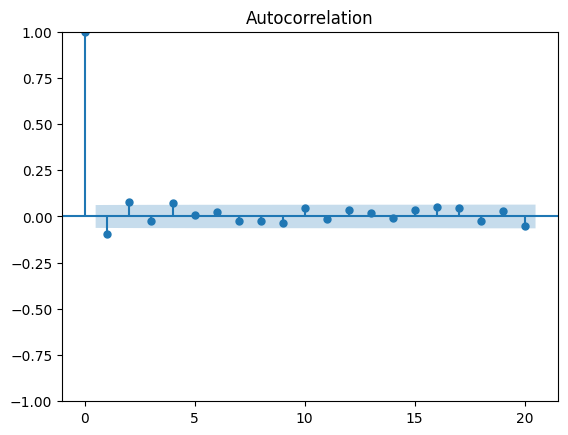

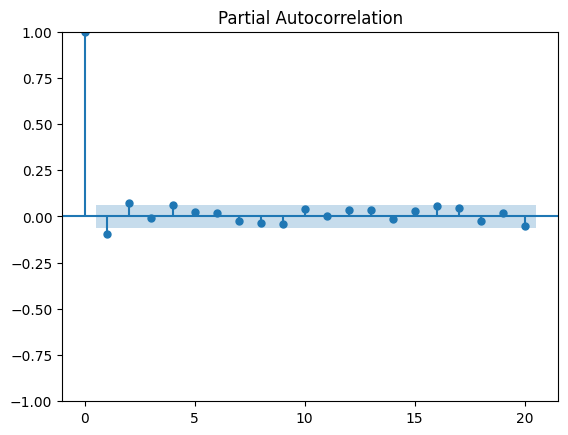

In [146]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(returns, lags = 20)
plot_pacf(returns, lags = 20)
plt.show()


Based on these plots, it would appear that an ARMA model may not be necessary for the return series, as both the ACF and PACF do not show significant correlations at higher lags.
However, to apply some ARMA model, we can try ARMA(1,1), as an ARMA(1,1) is a relatively simple model that assumes one lag for both the AR and MA components, and also, there are some small, though significant values for one lag for both ACF and PACF, which are decisive for deciding MA and AR model orders.

In [147]:
from statsmodels.tsa.arima.model import ARIMA

arma_model = ARIMA(returns, order=(1,0,1))
arma_results = arma_model.fit()

print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                  999
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2815.513
Date:                Mon, 11 Dec 2023   AIC                           5639.026
Time:                        02:40:55   BIC                           5658.653
Sample:                             0   HQIC                          5646.486
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0498      0.140     -0.355      0.723      -0.325       0.225
ar.L1         -0.7188      0.120     -5.981      0.000      -0.954      -0.483
ma.L1          0.6324      0.134      4.704      0.0

Text(0, 0.5, 'Residuals')

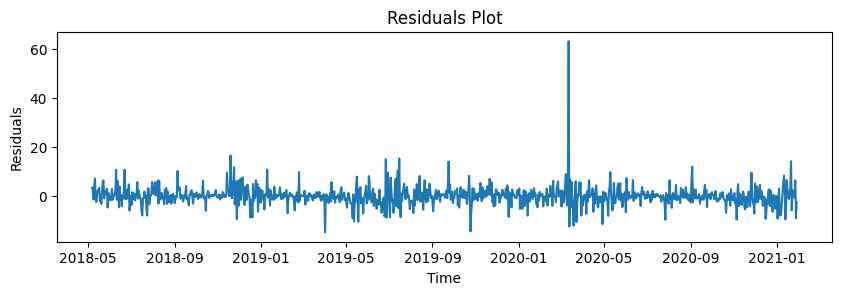

In [148]:
residuals = pd.DataFrame(arma_results.resid)
residuals.index = returns.index

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')

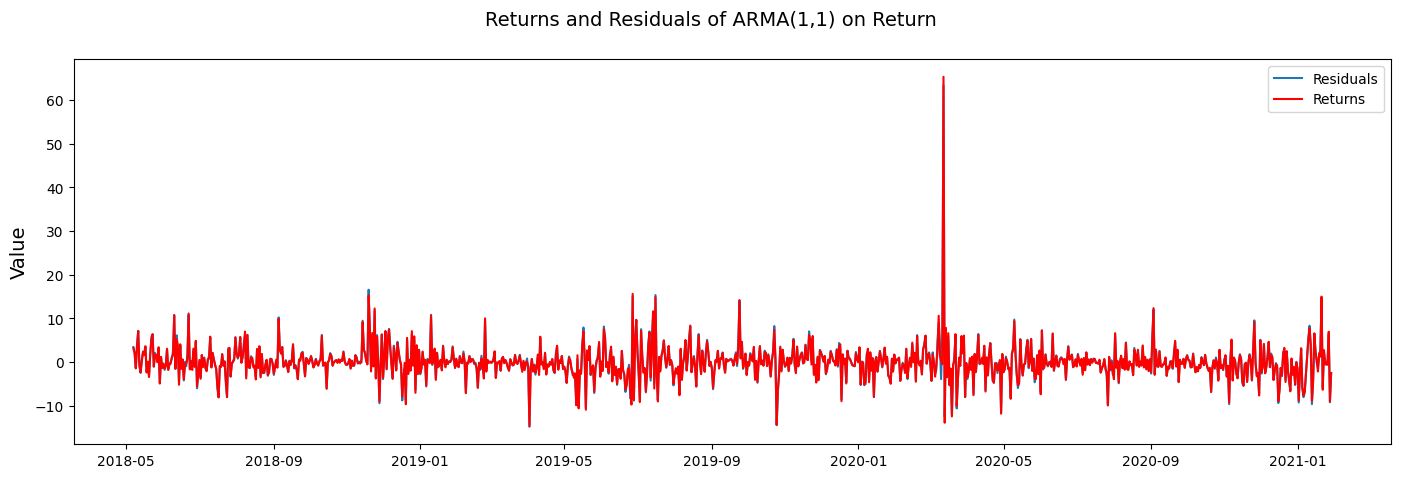

In [149]:
fig, ax = plt.subplots(figsize=(17, 5))
fig.suptitle("Returns and Residuals of ARMA(1,1) on Return", size=14)

ax.plot(residuals, label='Residuals')
ax.set_ylabel('Value', size=14)

ax.plot(returns, label='Returns', color='red')
ax.set_ylabel('Value', size=14)

ax.legend()

plt.show()

From the plot, the residuals of the ARMA(1,1) model are very much similar in values visually to Returns values, so not much new to be said about residuals stationarity only considering the visual part, the graph suggests that the residuals are most likely white noise.

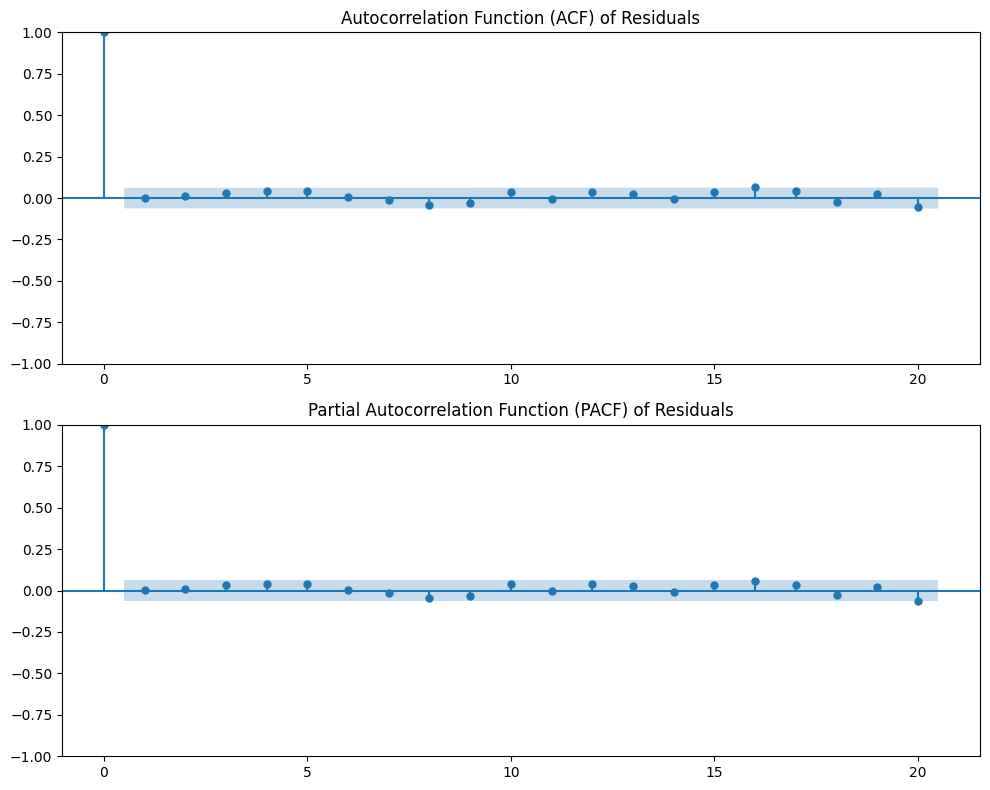

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

plot_acf(residuals, lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of Residuals')

plot_pacf(residuals, lags=20, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()

Both ACF and PACF demonstrate very unsignificant values for any lags larger than 0, even less than ACF and PACF values for returns, so this makes the ARMA model a little more preferable, and the characteristic described above is also a feature of stationary series.

In [54]:
ljung_test = sm.stats.acorr_ljungbox(residuals, lags=10, return_df = True)
ljung_test

,lb_stat,lb_pvalue
1,0.000167,0.989675
2,0.142642,0.931163
3,1.095810,0.778086
4,2.785807,0.594285
5,4.407789,0.492315
6,4.439528,0.617419
7,4.575341,0.711627
8,6.238862,0.620495
9,7.180759,0.618306
10,8.721019,0.558769


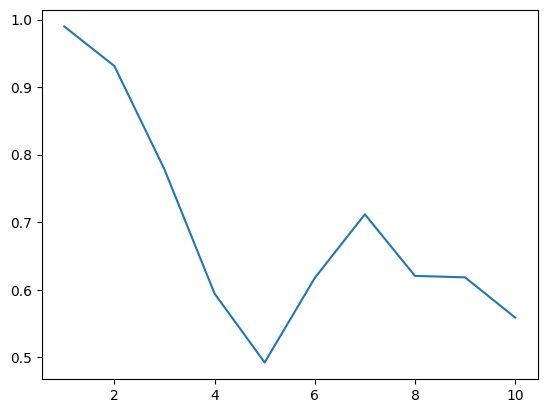

In [55]:
plt.plot(ljung_test.index,ljung_test.lb_pvalue)

The Ljung-Box test results for the squared residuals, with p-values above 0.05 for the first 10 lags, indicate no significant autocorrelation. This implies the volatility of the returns is fairly constant over time, suggesting that the residuals from the ARMA(1,1) model do not exhibit heteroskedasticity. Thus, the ARMA(1,1) model appears to be adequate in this respect, as it captures the essential patterns in the return series.

This does not necessarily mean the model is the best or the most predictive one, but it does suggest that the model's assumptions are not violated by autocorrelation in the residuals.

In [151]:
squared_residuals = residuals**2
squared_residuals.index = residuals.index

ljung_box_result = sm.stats.acorr_ljungbox(squared_residuals, lags=10, return_df=True)

print(ljung_box_result)

     lb_stat  lb_pvalue
1   2.021777   0.155058
2   2.183380   0.335649
3   2.185448   0.534820
4   2.733826   0.603309
5   2.805849   0.729888
6   2.805955   0.832778
7   3.904247   0.790738
8   3.916059   0.864616
9   3.928954   0.916026
10  3.982835   0.948118


Since the p-values are higher than typical sign. level 0.05, there's not enough statistical evidence to reject the null hypothesis of no autocorrelation in the squared residuals at each of the lags tested. This suggests that the residuals do not exhibit autocorrelation patterns.

The absence of autocorrelation in squared residuals typically implies that there is no heteroskedasticity. In other words, the variance of the residuals does not change over time, which means there's no volatility clustering commonly associated with financial time series.

The ARMA(1,1) model appears to capture the essential dynamics of the return series effectively, without leaving patterns of volatility (changes in variance) unmodeled in the residuals.

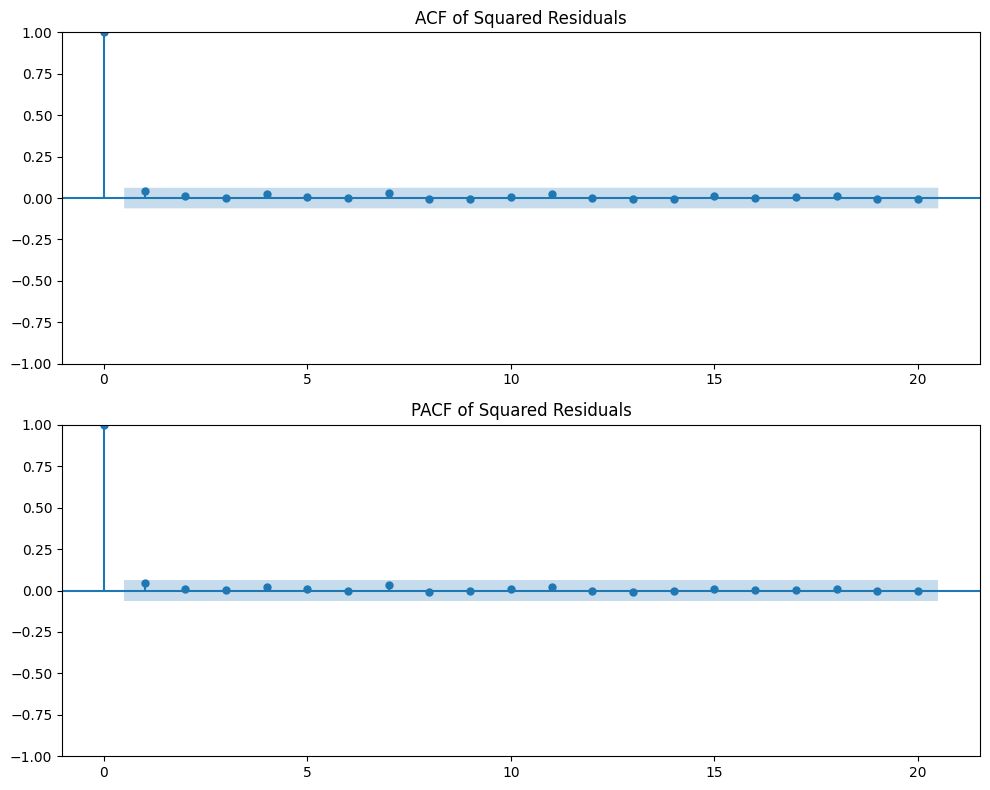

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

plot_acf(squared_residuals, lags=20, ax=axes[0])
axes[0].set_title('ACF of Squared Residuals')

plot_pacf(squared_residuals, lags=20, ax=axes[1])
axes[1].set_title('PACF of Squared Residuals')

plt.tight_layout()
plt.show()

The only near value to significance border is at the first lag in both ACF and PACF, hence it suggests that incorporating both GARCH and ARCH terms of order 1 could potentially capture the observed volatility clustering, assuming that the significance at the first lag is statistically significant.

In [153]:
from arch import arch_model

model=arch_model(residuals, mean='Zero',  vol='Garch', p=1, o=0, q=1, dist='Normal')
results = model.fit(disp= False)
print(results.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2680.00
Distribution:                  Normal   AIC:                           5366.00
Method:            Maximum Likelihood   BIC:                           5380.72
                                        No. Observations:                  999
Date:                Mon, Dec 11 2023   Df Residuals:                      999
Time:                        02:41:17   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.6429      3.530      1.032      0.302 [ -3.276, 10.56

In [154]:
final = pd.concat([returns, results.conditional_volatility], 1)
final = final.rename(columns={ 'cond_vol':'GARCH(1,1)'})
final

,Return,"GARCH(1,1)"
date,,
2021-01-29,-2.564074,5.198041
2021-01-28,-9.008552,4.235118
2021-01-27,6.922491,6.625865
2021-01-26,-0.646316,6.180228
2021-01-25,0.016308,4.527809
...,...,...
2018-05-11,7.093436,2.858062
2018-05-10,3.419049,5.162865
2018-05-09,-1.417830,4.666799


In [155]:
best_aic = float("inf")
best_order = (0, 0)

for p in range(1, 4):
    for q in range(1, 4):
        try:
            best_model = arch_model(squared_residuals, vol='Garch', p=p, q=q)
            best_results = best_model.fit(disp='off')

            aic = best_results.aic

            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)

        except Exception as e:
            print(f"Issue with GARCH({p},{q}): {e}")

print(f"Best GARCH(p, q) model: GARCH{best_order} with AIC={best_aic}")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp f

Best GARCH(p, q) model: GARCH(1, 1) with AIC=10176.293533536576


In summary, we reached to point, that both theoretically and by using Information Criteria, we got same order, and we will proceed forecasting the volatility with the GARCH(1,1) model.

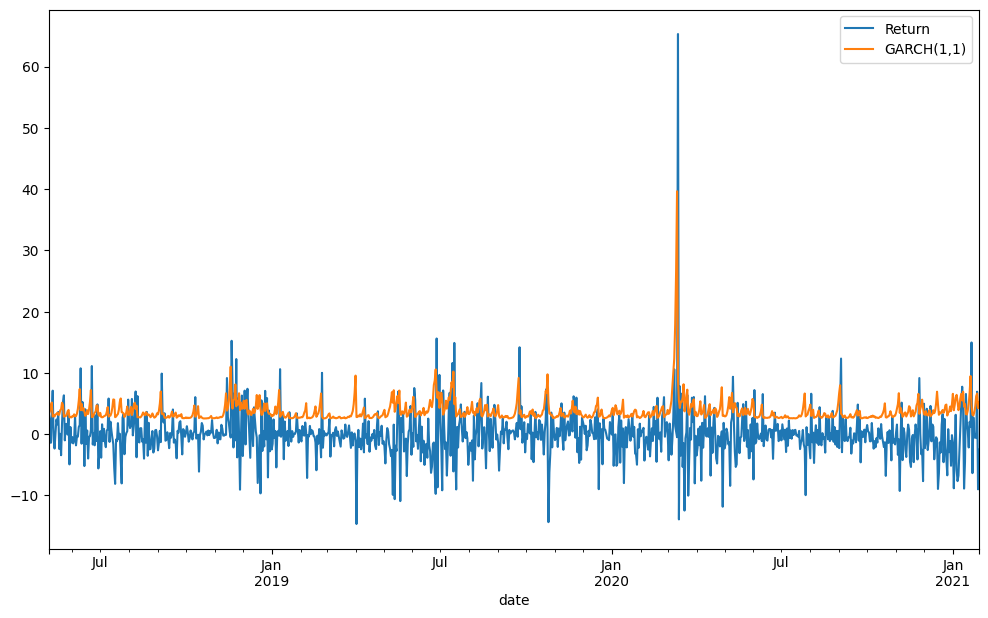

In [156]:
subplot = final.plot(figsize = [12,7])

The graph plots financial returns (blue) with a GARCH(1,1) model's volatility estimates (orange). The GARCH model traces volatility trends, responding to spikes in returns, but doesn't capture their magnitude, which is typical of such models that forecast volatility rather than actual values of returns. The model seems to track the underlying volatility pattern reasonably well enough to forecast with it.

In [163]:
history = list(residuals) 
predictions = []

for _ in range(10):
    model_fit = model.fit(last_obs=len(history), disp= False)
    forecast = model_fit.forecast(horizon=1)
    
    yhat = np.sqrt(forecast.variance.values[-1, :][0])  
    
    predictions.append(yhat)
    
    history.append(yhat)

In [164]:
last_index = residuals.index[0]
prediction_index = pd.date_range(start=last_index, periods=10, freq='D')

predictions_df = pd.DataFrame(predictions, index=prediction_index, columns=['Volatility'])

print(predictions_df)

            Volatility
2021-01-29    2.528008
2021-01-30    7.930264
2021-01-31    7.079917
2021-02-01    5.760128
2021-02-02    0.003097
2021-02-03    0.002983
2021-02-04    0.003019
2021-02-05    1.324551
2021-02-06    5.352547
2021-02-07    6.291964


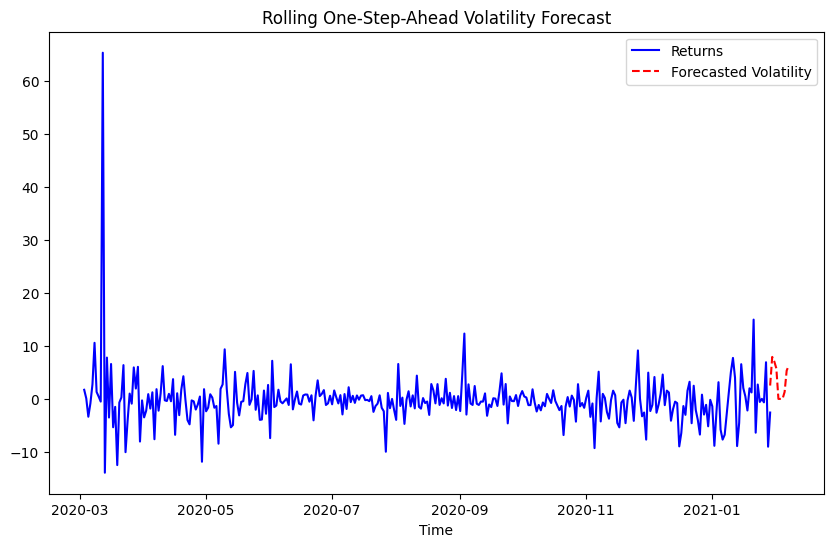

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(returns[:len(returns)//3], label='Returns', color='blue')
plt.plot(predictions_df, label='Forecasted Volatility', color='red', linestyle='--')
plt.title('Rolling One-Step-Ahead Volatility Forecast')
plt.xlabel('Time')
plt.legend()
plt.show()

In our project, we found that SARIMA and EST models are somewhat effective when forecasting Bitcoin prices based on recent data, due to their traditional design for linear and stable time series. Our findings indicate that the EST model, which emphasizes recent data through exponential smoothing, more accurately captures the current trends and fluctuations in Bitcoin prices, in contrast the SARIMA models which struggled to adapt to the rapid and non-linear price movements that characterize cryptocurrencies.
However, this is in stark contrast to the volatile and complex nature of the cryptocurrency market when considering the entire historical data, where both models fail to predict market performance.

While SARIMA and EST models can provide a general direction of price trends in the short term, their performance is limited during periods of intense market volatility. They often fail to predict the extent of price swings, highlighting a significant gap when used for long-term forecasting in the dynamic cryptocurrency domain.

This limitation led us to consider GARCH-type models, renowned for their robustness in volatile financial series. GARCH models are particularly adept at modeling the time-varying volatility that characterizes Bitcoin, making them a more suitable choice for capturing the market's frequent and unpredictable fluctuations in terms of volatility. Their utilization offers a more nuanced approach to risk management and volatility forecasting, which is indispensable for navigating the intricate cryptocurrency markets.

As the cryptocurrency landscape continues to evolve, the development of more sophisticated forecasting models becomes essential to navigate its unique challenges and opportunities.